<a href="https://colab.research.google.com/github/DC769/Python-Workshop/blob/main/DC_UG_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install wheel

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

import talib as ta

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tf_keras

In [ ]:
import yfinance

In [ ]:
import yfinance as yf
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [ ]:
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

In [ ]:
def calculate_technical_indicators(data):
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

    return data

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data['Close'].iloc[i+sequence_length]
        sequences.append((sequence, target))
    return sequences

In [ ]:

symbols = [ 'NMDC.BO', 'MOIL.BO', 'VEDL.BO']
start_date = '2019-01-01'
end_date = '2023-01-01'


data = pd.DataFrame()

for symbol in symbols:
    stock_data = fetch_stock_data(symbol, start_date, end_date )
    data[symbol] = stock_data['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:



data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)





In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data['Close'].iloc[i+sequence_length]  # Corrected this line
        sequences.append((sequence, target))
    return sequences



In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length, :-1]
        target = data[i+sequence_length, -1]
        sequences.append((sequence, target))
    return sequences



In [ ]:
sequence_length = 10
sequences = create_sequences(data_normalized, sequence_length)


X = np.array([seq[0] for seq in sequences])
y = np.array([seq[1] for seq in sequences])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
25/25 - 3s - loss: 0.0651 - val_loss: 0.0282 - 3s/epoch - 134ms/step
Epoch 2/50
25/25 - 0s - loss: 0.0228 - val_loss: 0.0213 - 184ms/epoch - 7ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0201 - val_loss: 0.0197 - 186ms/epoch - 7ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0187 - val_loss: 0.0182 - 183ms/epoch - 7ms/step
Epoch 5/50
25/25 - 0s - loss: 0.0185 - val_loss: 0.0176 - 190ms/epoch - 8ms/step
Epoch 6/50
25/25 - 0s - loss: 0.0179 - val_loss: 0.0171 - 190ms/epoch - 8ms/step
Epoch 7/50
25/25 - 0s - loss: 0.0172 - val_loss: 0.0178 - 311ms/epoch - 12ms/step
Epoch 8/50
25/25 - 0s - loss: 0.0180 - val_loss: 0.0164 - 248ms/epoch - 10ms/step
Epoch 9/50
25/25 - 0s - loss: 0.0170 - val_loss: 0.0163 - 255ms/epoch - 10ms/step
Epoch 10/50
25/25 - 0s - loss: 0.0169 - val_loss: 0.0166 - 298ms/epoch - 12ms/step
Epoch 11/50
25/25 - 0s - loss: 0.0165 - val_loss: 0.0157 - 246ms/epoch - 10ms/step
Epoch 12/50
25/25 - 0s - loss: 0.0162 - val_loss: 0.0154 - 264ms/epoch - 11ms/step
Epoch 13/50
25/25 - 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
25/25 - 4s - loss: 0.0484 - val_loss: 0.0214 - 4s/epoch - 163ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0203 - val_loss: 0.0182 - 463ms/epoch - 19ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0195 - val_loss: 0.0173 - 438ms/epoch - 18ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0194 - val_loss: 0.0166 - 438ms/epoch - 18ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0183 - val_loss: 0.0198 - 442ms/epoch - 18ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0188 - val_loss: 0.0169 - 410ms/epoch - 16ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0174 - val_loss: 0.0159 - 460ms/epoch - 18ms/step
Epoch 8/100
25/25 - 1s - loss: 0.0185 - val_loss: 0.0152 - 734ms/epoch - 29ms/step
Epoch 9/100
25/25 - 1s - loss: 0.0164 - val_loss: 0.0138 - 712ms/epoch - 28ms/step
Epoch 10/100
25/25 - 1s - loss: 0.0151 - val_loss: 0.0143 - 718ms/epoch - 29ms/step
Epoch 11/100
25/25 - 1s - loss: 0.0151 - val_loss: 0.0127 - 708ms/epoch - 28ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0131 - val_loss: 0.0154 - 439ms/epoch - 18ms/step
Epo

In [ ]:

model = Sequential()

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 41s 6ms/step


In [ ]:
if len(y_test.shape) > 1:
    num_companies = y_test.shape[1]
    y_pred_reshaped = y_pred.reshape(-1, num_companies)
else:
    num_companies = 1
    y_pred_reshaped = y_pred.reshape(-1, 1)



In [ ]:
# Assuming y_test is 1D
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)
    y_pred_reshaped = y_pred_reshaped.reshape(-1, 1)

# Manual inverse transformation
min_y = np.min(y_test, axis=0)
max_y = np.max(y_test, axis=0)

# Inverse transform the predictions and actual values to the original scale
y_pred_original = y_pred_reshaped * (max_y - min_y) + min_y
y_test_original = y_test * (max_y - min_y) + min_y



In [ ]:
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.21417194777934945


Epoch 1/100
25/25 - 6s - loss: 0.0468 - val_loss: 0.0219 - 6s/epoch - 229ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0228 - val_loss: 0.0183 - 403ms/epoch - 16ms/step
Epoch 3/100
25/25 - 0s - loss: 0.0200 - val_loss: 0.0177 - 429ms/epoch - 17ms/step
Epoch 4/100
25/25 - 0s - loss: 0.0192 - val_loss: 0.0167 - 437ms/epoch - 17ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0188 - val_loss: 0.0158 - 457ms/epoch - 18ms/step
Epoch 6/100
25/25 - 0s - loss: 0.0177 - val_loss: 0.0150 - 464ms/epoch - 19ms/step
Epoch 7/100
25/25 - 1s - loss: 0.0177 - val_loss: 0.0137 - 580ms/epoch - 23ms/step
Epoch 8/100
25/25 - 1s - loss: 0.0167 - val_loss: 0.0125 - 793ms/epoch - 32ms/step
Epoch 9/100
25/25 - 1s - loss: 0.0144 - val_loss: 0.0120 - 783ms/epoch - 31ms/step
Epoch 10/100
25/25 - 1s - loss: 0.0135 - val_loss: 0.0136 - 796ms/epoch - 32ms/step
Epoch 11/100
25/25 - 1s - loss: 0.0133 - val_loss: 0.0117 - 621ms/epoch - 25ms/step
Epoch 12/100
25/25 - 0s - loss: 0.0129 - val_loss: 0.0124 - 465ms/epoch - 19ms/step
Epo

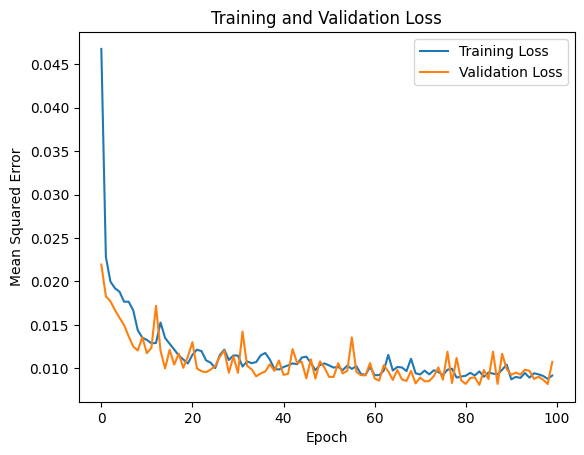

7/7 [==============================] - 0s 6ms/step


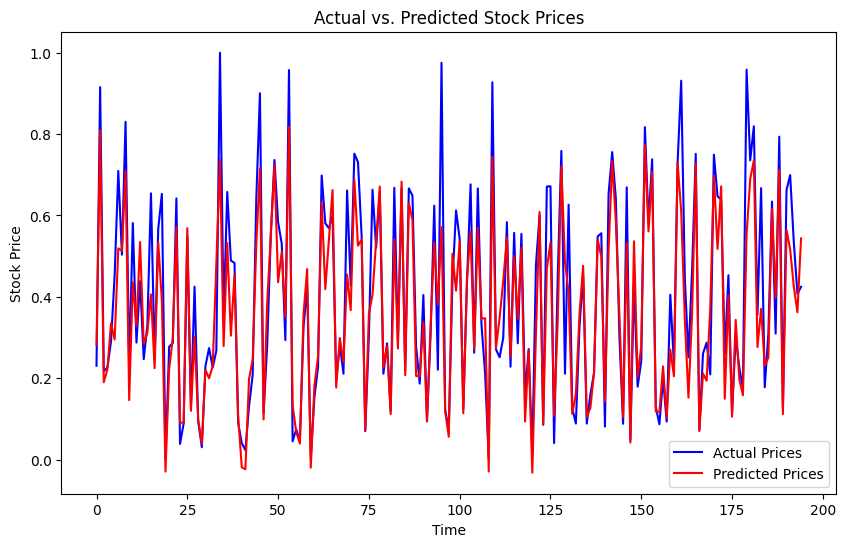

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam


model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model and record history for visualization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Visualize training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Print the column names of your DataFrame
print(stock_data.columns)

# Replace 'Date' with the correct column name in the code


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


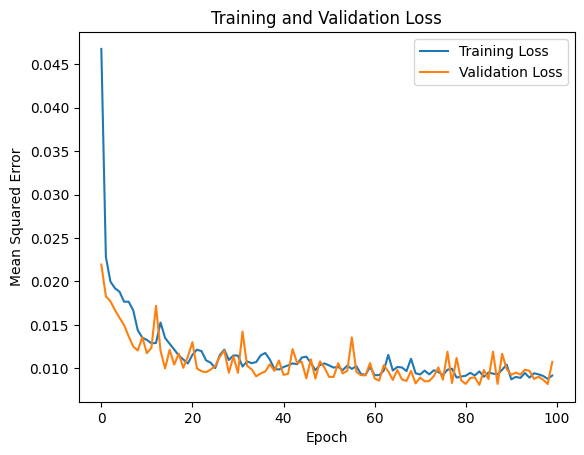

7/7 [==============================] - 0s 9ms/step


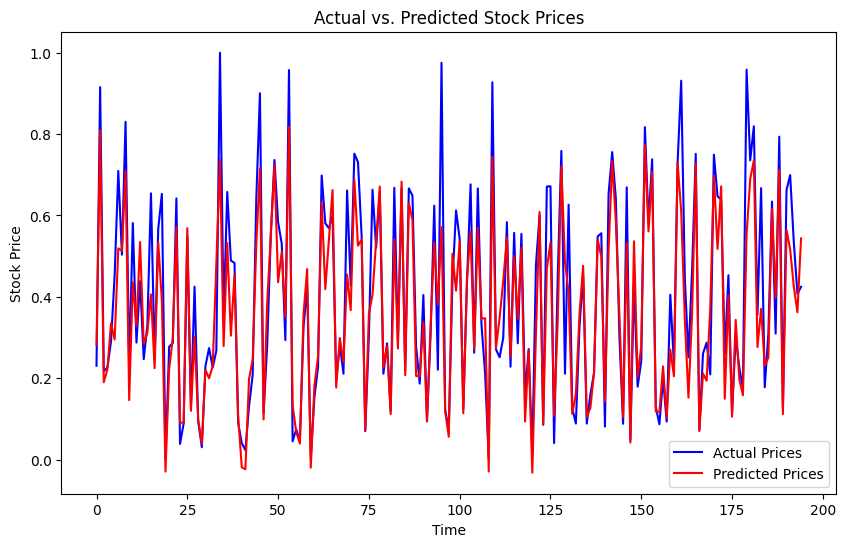

In [ ]:
# Visualize training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a date range and actual/predicted prices
date_range = pd.date_range(start='2024-01-01', end='2024-01-10', freq='D')
actual_prices = np.random.rand(len(date_range)) * 100
predicted_prices = actual_prices + np.random.randn(len(date_range)) * 10

# Create DataFrame
df_visualization = pd.DataFrame({'Date': date_range, 'Actual Price': actual_prices, 'Predicted Price': predicted_prices})



In [ ]:
fig.add_trace(go.Scatter(x=df_visualization['Date'], y=df_visualization['Actual Price'], mode='lines+markers', name='Actual Prices', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_visualization['Date'], y=df_visualization['Predicted Price'], mode='lines+markers', name='Predicted Prices', marker=dict(color='red')))


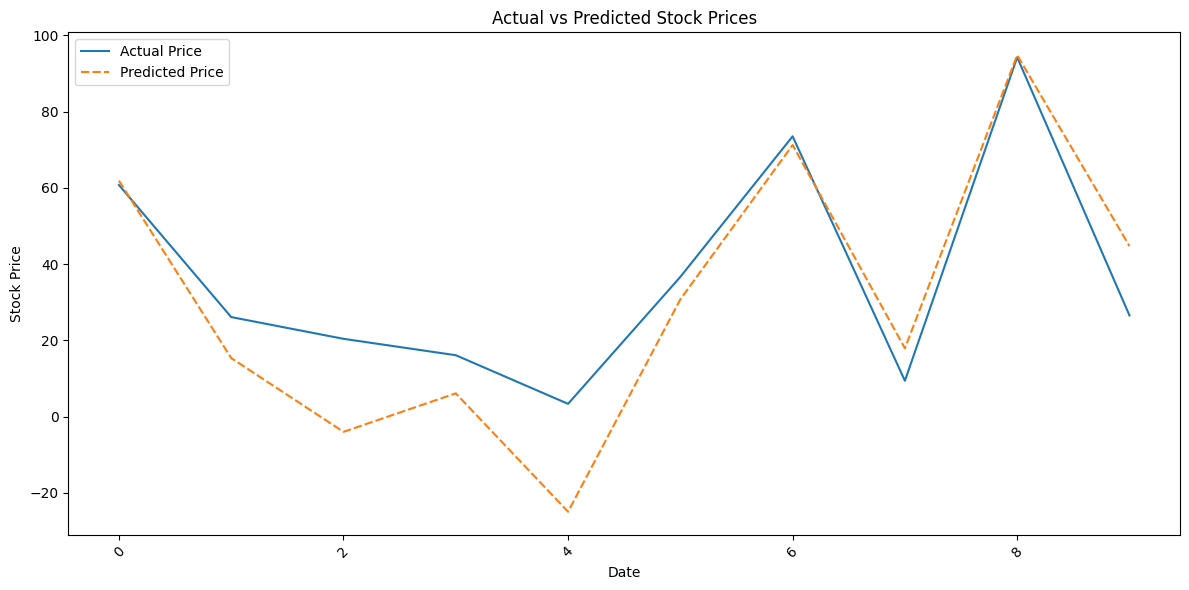

In [ ]:
import seaborn as sns

# Combine actual and predicted prices into a single DataFrame
df_combined = pd.concat([df_visualization['Actual Price'], df_visualization['Predicted Price']], axis=1)
df_combined.columns = ['Actual Price', 'Predicted Price']

# Create a line plot with shaded confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
